In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
def plot_boundaries(X_train, X_test, y_train, y_test, score, probability_func, h = .02, ax = None):
    X = np.vstack((X_test, X_train))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    Z = probability_func(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, 50, cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6, s=200)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')

In [11]:
def train_and_plot(X, y, h=1):
    #Divido el dataset en prueba y testing
    x_student_train,x_student_test,y_student_train,y_student_test = train_test_split(x,y,test_size=0.4)
    y_student_train=y_student_train.astype(int)
    y_student_test=y_student_test.astype(int)
 
       
    #Creo el model GaussianNB de Sklearn
    clf= GaussianNB()
    clf.fit(x_student_train,y_student_train.ravel())
    score_train= clf.score(x_student_train,y_student_train.ravel())
    print("Score: "+str(score_train))
    
    
    #testing del modelo
    y_predict_train = clf.predict(x_student_train)
    target_names = ["Dissaproved","Approved"]
    print("Classification report: ")
    print(metrics.classification_report(y_student_train,y_predict_train, target_names=target_names))
    print("Confusion Matrix: ")
    print( metrics.confusion_matrix(y_student_train,y_predict_train))
    
        
    #llamo a plot_bounderies fn
    plot_boundaries(x_student_train,x_student_test,y_student_train.ravel(),y_student_test.ravel(),score_train,clf.predict_proba)
    
    return

Score: 0.9333333333333333
Classification report: 
             precision    recall  f1-score   support

Dissaproved       0.88      0.96      0.92        24
   Approved       0.97      0.92      0.94        36

avg / total       0.94      0.93      0.93        60

Confusion Matrix: 
[[23  1]
 [ 3 33]]


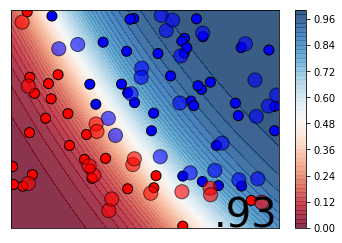

In [12]:
#Pruebo el modelo GaussianNB con student_admission.txt
student_admission_dataset="./datasets/student_admission.txt"

data=np.genfromtxt(fname=student_admission_dataset,delimiter=",")
y= data[:,-1]
x= data[:, :-1]

train_and_plot(x,y)

Score: 0.7571428571428571
Classification report: 
             precision    recall  f1-score   support

Dissaproved       0.77      0.75      0.76        36
   Approved       0.74      0.76      0.75        34

avg / total       0.76      0.76      0.76        70

Confusion Matrix: 
[[27  9]
 [ 8 26]]


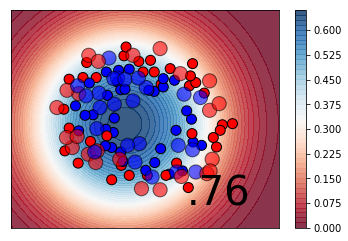

In [13]:
#Pruebo el modelo GaussianNB con chip_tests.txt
chip_tests_dataset="./datasets/chip_tests.txt"

data=np.genfromtxt(fname=chip_tests_dataset,delimiter=",")
y= data[:,-1]
x= data[:, :-1]

train_and_plot(x,y)